In [1]:
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('default')

import torch.optim as optim

from envs.mdp import StochasticMDPEnv
from agents.hdqn_mdp import hDQN, OptimizerSpec
from hdqn import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
NUM_EPISODES = 20000
BATCH_SIZE = 128
GAMMA = 1.0
REPLAY_MEMORY_SIZE = 1000000
LEARNING_RATE = 0.00025
ALPHA = 0.95
EPS = 0.01

optimizer_spec = OptimizerSpec(
    constructor=optim.RMSprop,
    kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS),
)

exploration_schedule = LinearSchedule(50000, 0.1, 1)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
)

env = StochasticMDPEnv()

In [3]:
agent, stats, visits = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)

/Users/nishantgurunath/Documents/CMU/10-708/Project/HRL/pytorch-hdqn/agents/hdqn_mdp.py:110: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return self.meta_controller(Variable(state, volatile=True)).data.max(1)[1].cpu()
/Users/nishantgurunath/Documents/CMU/10-708/Project/HRL/pytorch-hdqn/agents/hdqn_mdp.py:120: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return self.controller(Variable(joint_state_goal, volatile=True)).data.max(1)[1].cpu()


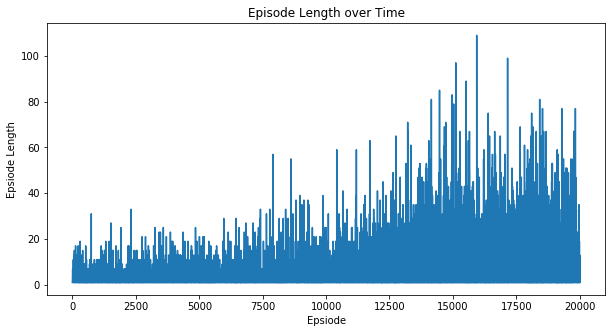

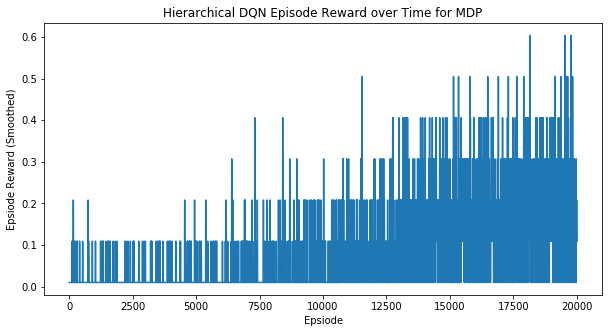

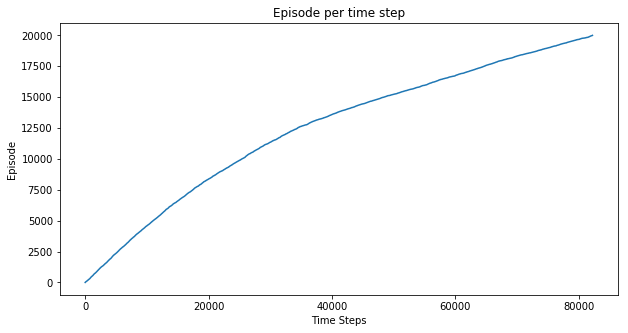

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [4]:
plot_episode_stats(stats)

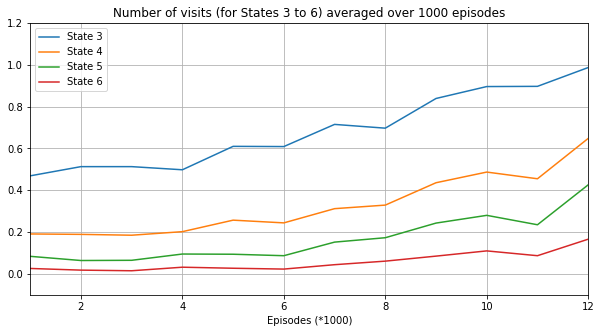

In [5]:
plot_visited_states(visits, NUM_EPISODES)

In [6]:
print (visits)

[[1000. 1336.  469.  191.   84.   26.]
 [1000. 1370.  513.  189.   64.   18.]
 [1000. 1378.  513.  185.   65.   15.]
 [1000. 1359.  498.  202.   95.   32.]
 [1000. 1420.  610.  257.   94.   27.]
 [1000. 1429.  609.  244.   87.   23.]
 [1000. 1511.  715.  312.  152.   44.]
 [1000. 1480.  697.  329.  173.   61.]
 [1000. 1561.  839.  436.  243.   85.]
 [1000. 1579.  896.  487.  280.  110.]
 [1000. 1590.  897.  455.  235.   87.]
 [1000. 1599.  987.  648.  426.  166.]
 [1000. 1662. 1110.  758.  546.  236.]
 [1000. 1811. 1430. 1071.  804.  352.]
 [1000. 1817. 1524. 1310. 1069.  466.]
 [1000. 1937. 1751. 1470. 1202.  546.]
 [1000. 1851. 1555. 1319. 1088.  473.]
 [1000. 1816. 1503. 1272. 1053.  468.]
 [1000. 1969. 1810. 1593. 1391.  639.]
 [1000. 1926. 1744. 1510. 1303.  611.]]


In [7]:
np.save('./results/stats.npy',stats)

In [11]:
rewards = stats.episode_rewards
np.save('n20000.npy',rewards)
print (rewards.shape)

(20000,)


(200, 100)
(200,)


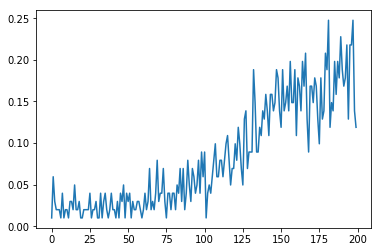

In [9]:

rewards = rewards.reshape(-1,100)
print (rewards.shape)
rewards = np.mean(rewards,axis=1)
print (rewards.shape)
np.save('n20000.npy',rewards)

rewards1 = np.load('mdp_20000_raw.npy')
rewards1 = rewards1.reshape(-1,100)
rewards1 = np.mean(rewards1,axis=1)
np.save('r20000.npy',rewards)

matplotlib.pyplot.plot(rewards)